We create an ANN to predict het Genre (Non Fiction or Fiction) based on the Title of a book.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced data visualisation
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

# fix random seed for reproducibility
seed = 2020
np.random.seed(seed)  

import sklearn as sk
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Embedding, Conv1D,  MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model


import nltk


2.8.0


Read the file bestsellers with categories.csv

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/bestsellers.csv") 
data.head(20)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


What are the names of the columns?

In [3]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

Give some general info about the numeric columns (mean, std, ...)

In [4]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


What are all the possible values for Genre?

In [5]:
data['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Some books appear more than 1 time in the list. Remove the books with the same Name, Author, User Rating and Reviews.

How many rows are left?


In [6]:
data = data.drop_duplicates(subset=['Name', 'Author','User Rating','Reviews'], keep='first')
data.count()

Name           352
Author         352
User Rating    352
Reviews        352
Price          352
Year           352
Genre          352
dtype: int64

Suppose the number of reviews would be an indicator of the number of books that were sold (the more people that read the book, the more people that review the book). What would be the top 10 of sold books? 

In [7]:
data.groupby('Name')['Reviews'].sum().sort_values(ascending=False).head(10)

Name
Where the Crawdads Sing                                                                     87841
The Girl on the Train                                                                       79446
Becoming                                                                                    61133
Gone Girl                                                                                   57271
The Fault in Our Stars                                                                      50482
The Nightingale: A Novel                                                                    49288
Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)    47265
The Martian                                                                                 39459
All the Light We Cannot See                                                                 36348
The Alchemist                                                                               35799
Name: Reviews, 

What is the average rating per title and per year. Sort in a descending way on the rating.

In [8]:
data.groupby(['Name','Year'])['User Rating'].mean().sort_values(ascending=False)

Name                                                                                             Year
Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3)              2017    4.9
Humans of New York : Stories                                                                     2015    4.9
Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)  2012    4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2)        2014    4.9
Brown Bear, Brown Bear, What Do You See?                                                         2017    4.9
                                                                                                        ... 
The Goldfinch: A Novel (Pulitzer Prize for Fiction)                                              2013    3.9
Allegiant                                                                                        2013    3.9
Fifty Shades of Grey: Book

Are Non Fictional books more often reviewed than Fictional books?

Calculate the percentage share of reviews

Make the overview below

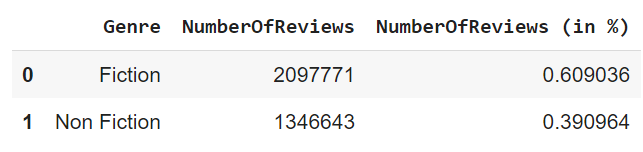

In [9]:
extra = data.groupby('Genre')['Reviews'].sum().reset_index(name='NumberOfReviews')
totalNumberOfReviews = data['Reviews'].sum()
extra['NumberOfReviews (in %)'] = extra['NumberOfReviews'].apply(lambda x: x / totalNumberOfReviews)
extra.head(50)

,Genre,NumberOfReviews,NumberOfReviews (in %)
0,Fiction,2097771,0.609036
1,Non Fiction,1346643,0.390964


Are there any authors that both have written Fictional and Non Fictional books?

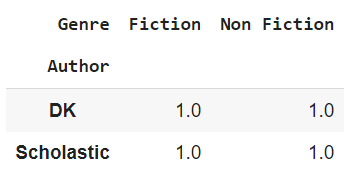

In [10]:
table = pd.pivot_table(data, values='Name', index='Author',columns='Genre',aggfunc='count').fillna(0)
table[(table['Fiction'] >= 1) & (table['Non Fiction'] >= 1)]

Genre,Fiction,Non Fiction
Author,,
DK,1.0,1.0
Scholastic,1.0,1.0


We want to create an ANN to try to predict het Genre (Non Fiction or Fiction) based on the Title of the book.

We only want to do this for the books in english. Remove the other books.

In [30]:
if 'google.colab' in str(get_ipython()):
    colab = True
    print ('You are running on Google Colab')
    !pip install langdetect
else:
    colab = False
    print ('You are not running on Google Colab')

You are not running on Google Colab


In [11]:
from langdetect import detect
data['Lang'] = data['Name'].apply(detect)
data.head(30)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Lang
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,en
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,hu
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,en
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,en
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,en
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,en
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,en
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,en
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,en
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,en


In [12]:
data = data[data['Lang'] == 'en']
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Lang
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,en
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,en
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,en
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,en
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,en


In [13]:
len(data)

315

Remove stopwords and put the entire name of the book in lower case.

In [14]:
nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
stop_words_en = set(stopwords.words('english'))     

def remove_stopwords_en(text):

    punctuations="?:!.,;<>/\+-"
    # turn the string into a list of words based on separators (blank, comma, etc.)
    word_tokens = word_tokenize(text.lower())
    # create a list of all words that are neither stopwords nor punctuations
    result = [x for x in word_tokens if x not in stop_words_en and x not in punctuations]
    
    # create a new string of all remaining words
    seperator = ' '
    return seperator.join(result)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcor864\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data['Name'] = data['Name'].apply(remove_stopwords_en)

Replace Fiction by 0 and Non Fiction by 1

In [16]:
data['Genre'] = np.where(data['Genre'] == 'Fiction', 0 , 1)

## Using pre-trained word embeddings

What is the average length of the Text's. This will be important when we need to truncate the sequences to a maximum length?  
75% of the blogs consist of how many words?

In [17]:
# from nltk.tokenize import word_tokenize
data["numberOfWords"] = data["Name"].str.split().map(len)
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Lang,numberOfWords
0,10-day green smoothie cleanse,JJ Smith,4.7,17350,8,2016,1,en,4
2,12 rules life antidote chaos,Jordan B. Peterson,4.7,18979,15,2018,1,en,5
3,1984 ( signet classics ),George Orwell,4.7,21424,6,2017,0,en,5
4,"5,000 awesome facts ( everything ) ( national ...",National Geographic Kids,4.8,7665,12,2019,1,en,11
5,dance dragons ( song ice fire ),George R. R. Martin,4.4,12643,11,2011,0,en,7


In [18]:
data['numberOfWords'].describe()

count    315.000000
mean       7.076190
std        3.949591
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       18.000000
Name: numberOfWords, dtype: float64

What is X_train, y_train, X_test, y_test?

In [19]:
# Extract a training & validation split
from sklearn.model_selection import train_test_split
X = data['Name']
y = data['Genre']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

What is X_train, y_train, X_val, y_val?

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

In [21]:
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of x_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (201,)
Shape of x_test: (63,)
Shape of x_val: (51,)
Shape of y_train: (201,)
Shape of y_test: (63,)
Shape of y_val: (51,)


Transform X_train, X_val and X_test into an array

In [22]:
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
X_test = np.asarray(X_test)

print('X_train shape:', X_train.shape)
print(type(X_train))

X_train shape: (201,)
<class 'numpy.ndarray'>


Convert y_train, y_val and y_test to a vector with 1 zero and a single 1, corresponding to the right class.

In [ ]:
num_classes = 2
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_val = keras.utils.to_categorical(y_val, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)


Look at the new labels for the first sample.

In [23]:
#print(y_test[0])


KeyError: 0

### Create a vocabulary index

Use the TextVectorization to index the vocabulary found in the dataset. Later, the same layer instance will be used to vectorize the samples.

The layer will only consider the top 20,000 words. Truncate or pad sequences according to the 75% quartile of the number of words.

In [24]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=10)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)


You can retrieve the computed vocabulary used via vectorizer.get_vocabulary().  
Let's print the top 5 words

In [25]:
vectorizer.get_vocabulary()[:5]

['', '[UNK]', 'book', 's', 'novel']

Vectorize a small sentence "the girl was unhappy" 

In [26]:
output = vectorizer([["i saw the girl was unhappy"]])
output.numpy()[0, :8]

array([ 1,  1,  1, 35,  1,  1,  0,  0], dtype=int64)

By which number is i represented? And girl? 
Give the dict mapping words to their indices.

In [27]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

### Load pre-trained word embeddings


Make a dict mapping words (strings) to their NumPy vector representation. Use the 100-dimensional vectors.

In [32]:
if colab: 
  path_to_glove_file = '/content/gdrive/My Drive/glove.6B.100d.txt'
else:
  path_to_glove_file = 'datasets/glove.6B.100d.txt'

embeddings_index = {}
with open(path_to_glove_file, encoding='utf-8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


Prepare a corresponding embedding matrix that can be ued in a Keras Embedding layer. It's a simple NumPy matrix where the entry at index i is the pre-trained vector for the word of index i in our vectorizer's vocabulary.

In [33]:
num_tokens = len(voc) + 2
# each word is represented by a vector of 100 floats (glove.6B.100d.txt)
embedding_dim = 100
hits = 0
misses = 0
missed_words = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
# word_index is a dictionary that maps each word to an index
# we loop through all the words of word_index.items()
for word, i in word_index.items():
# we try to retrieve the vector of 100 floats for this word out of embeddings_index  
    embedding_vector = embeddings_index.get(word)
# if we found the corresponding vector of 100 floats    
    if embedding_vector is not None:
      # we put the vector on position i of embedding_matrix
        embedding_matrix[i] = embedding_vector
        hits += 1    
    else:
      # Words not found in embedding index will be all-zeros.    
        misses += 1
        missed_words.append(word)
        
print("Converted %d words (%d misses)" % (hits, misses))

print("*** Missed words = words not in word_index ***")
print(missed_words[0:10])
print()


Converted 740 words (27 misses)
*** Missed words = words not in word_index ***
['', '[UNK]', 'oreilly', 'stackhousetrue', 'bundo', 'ultrahealthy', 'stepbystep', 'spiritual…', 'solve…', 'shamefree']



### Build the model
First, convert our list-of-strings data to NumPy arrays of integer indices. The arrays are right-padded.

In [34]:
X_train_final = vectorizer(np.array([s for s in X_train])).numpy()
X_val_final =  vectorizer(np.array([s for s in X_val])).numpy()
X_test_final = vectorizer(np.array([s for s in X_test])).numpy()

y_train_final = np.array(y_train)
y_val_final = np.array(y_val)
y_test_final = np.array(y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_val_final.shape)
print(y_test_final.shape)

(201,)
(51,)
(63,)
(201, 10)
(51, 10)
(63, 10)
(201,)
(51,)
(63,)


Create a small ANN model to predict the Label. Load the pre-trained word embeddings matrix into an Embedding layer.

Compile the model.

Train the model.

Evaluate the model

In [35]:
# helper functions for visualisation
# plotting the loss functions used in this notebook
# we plot the loss we want to optimise on the left (in this case: accuracy)
def plot_history(history):
  plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)

  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']),'g-',
           label='Train accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),'r-',
           label = 'Validation accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Loss minimised by model')
  plt.plot(history.epoch, np.array(history.history['loss']),'g-',
           label='Train loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),'r-',
           label = 'Validation loss')
  plt.legend()

In [36]:
num_classes = 2

def initial_model():
    # we create a variable called model, and we set it equal to an instance of a Sequential object.
    model = Sequential()

    model.add(Embedding(input_dim=num_tokens, output_dim=embedding_dim, input_length=10,embeddings_initializer=keras.initializers.Constant(embedding_matrix),trainable=False))
    model.add(keras.layers.Flatten(input_shape=[num_tokens, embedding_dim]))

    model.add(keras.layers.Dense(64, activation="relu", kernel_initializer="he_uniform"))
    model.add(keras.layers.Dropout(rate=0.4))
    model.add(keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"))
    model.add(keras.layers.Dropout(rate=0.4))
    model.add(Dense(num_classes, activation='softmax'))


    # Before we can train our model, we must compile it
    # To the compile() function, we are passing the optimizer, the loss function, and the metrics that we would like to see. 
    # Notice that the optimizer we have specified is called Adam. Adam is just a variant of SGD. 
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01),
                  metrics=['accuracy']) 
    return model


In [40]:
model = initial_model()

batch_size = 64
epochs = 10

history = model.fit(X_train_final, y_train_final,epochs=20, batch_size=32, validation_data=(X_val_final,y_val_final))


Epoch 1/20
7/7 [==============================] - 0s 15ms/step - loss: 0.7372 - accuracy: 0.5622 - val_loss: 0.6381 - val_accuracy: 0.6275
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7910 - val_loss: 0.5670 - val_accuracy: 0.7059
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.8955 - val_loss: 0.7839 - val_accuracy: 0.6471
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2831 - accuracy: 0.8806 - val_loss: 0.7084 - val_accuracy: 0.6667
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9502 - val_loss: 0.5687 - val_accuracy: 0.7059
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9403 - val_loss: 0.6081 - val_accuracy: 0.7255
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9453 - val_loss: 0.7672 - val_accuracy: 0.6275
Epoch 8/20
7/7 [=================

Training set Accuracy:   1.00
Training set Loss: 0.0001

Validation set Accuracy:   0.67
Validation set Loss: 1.2241



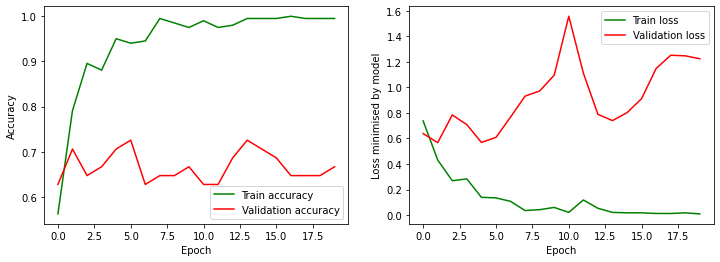

In [41]:
[train_loss, train_accuracy] = model.evaluate(X_train_final, y_train_final, verbose=0)
print("Training set Accuracy:{:7.2f}".format(train_accuracy))
print("Training set Loss:{:7.4f}\n".format(train_loss))

[val_loss, val_accuracy] = model.evaluate(X_val_final, y_val_final, verbose=0)
print("Validation set Accuracy:{:7.2f}".format(val_accuracy))
print("Validation set Loss:{:7.4f}\n".format(val_loss))

#Now we visualise what happened during training
plot_history(history)

Give an overview of the incorrect predictions.

In [39]:
incorrect_predictions = []
predictions = []
real_values = []

for i, (p, e) in enumerate(zip(X_test, y_test_final)):
    predicted, expected = np.argmax(p), np.argmax(e)
    predictions.append(predicted)
    real_values.append(expected)

    if predicted != expected:  # prediction was incorrect
        incorrect_predictions.append((X_test[i], predicted, expected))

for r in incorrect_predictions:
  print(r)

Create a confusion matrix.

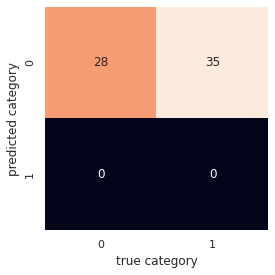

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import seaborn as sns; sns.set()

mat = confusion_matrix(real_values, predictions)

labels = [0, 1]

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category');
